In [1]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from matplotlib import pyplot as plt


In [2]:
(training_images, training_labels), (validation_images, validation_labels) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
def preprocess_image_input(input_images):
    input_images = input_images.astype('float32')
    output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
    return output_ims


In [4]:
train_X = preprocess_image_input(training_images)
valid_X = preprocess_image_input(validation_images)


In [5]:
def feature_extractor(inputs):
    feature_extractor = tf.keras.applications.resnet.ResNet50(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )(inputs)
    return feature_extractor


In [6]:
# Define the classifier on top of the ResNet50 features
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x


In [7]:
def final_model(inputs):
    resize = tf.keras.layers.UpSampling2D(size=(7, 7))(inputs)
    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)
    return classification_output

# Define and compile the full model with SGD optimizer
def define_compile_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    classification_output = final_model(inputs)
    model = tf.keras.Model(inputs=inputs, outputs=classification_output)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, decay=0.0, momentum=0.0),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [8]:
model = define_compile_model()
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification (Dense)               │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,215,818 (100.01 MB)

 Trainable params: 26,162,698 (99.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [9]:
history = model.fit(
    train_X, training_labels,
    batch_size=64,            # Set batch size to 64
    epochs=30,                # Set number of epochs to 30
    validation_data=(valid_X, validation_labels),
    validation_steps=1        # Set validation steps to 1
)



Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 482s 559ms/step - accuracy: 0.7003 - loss: 0.9587 - val_accuracy: 0.8750 - val_loss: 0.2346
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 445s 528ms/step - accuracy: 0.9474 - loss: 0.1648 - val_accuracy: 0.9688 - val_loss: 0.1119
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 442s 528ms/step - accuracy: 0.9752 - loss: 0.0792 - val_accuracy: 0.9531 - val_loss: 0.1097
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 442s 527ms/step - accuracy: 0.9901 - loss: 0.0385 - val_accuracy: 0.9531 - val_loss: 0.2114
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 442s 527ms/step - accuracy: 0.9961 - loss: 0.0203 - val_accuracy: 0.9531 - val_loss: 0.2240
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 442s 527ms/step - accuracy: 0.9983 - loss: 0.0121 - val_accuracy: 0.9531 - val_loss: 0.2113
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 412s 527ms/step - accuracy: 0.9989 - loss: 0.0084 - val_accuracy: 0.9219 - val_loss: 0.2516
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 442s 527ms/step - accuracy: 0.9991 -

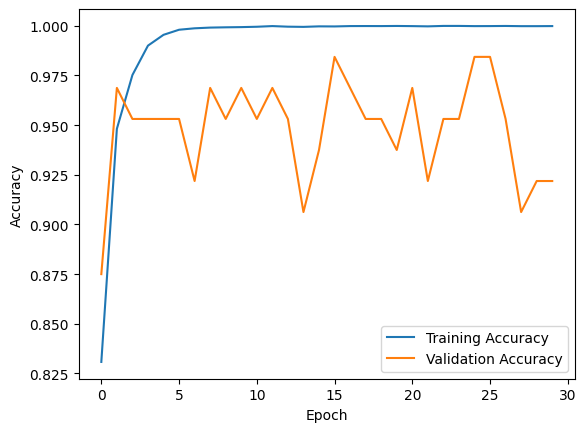

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
loss, accuracy = model.evaluate(valid_X, validation_labels, batch_size=64)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.9467 - loss: 0.2654
Test Accuracy: 94.67%
Test Loss: 0.2565
